## 1. 전복 데이터를 가지고 딥러닝 분류를 수행

In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv("../abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [10]:
X=df.drop('Rings',axis=1)
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
id,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,True,False


In [11]:
y=df['Rings']
y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [12]:
X = X.values
X.shape

(4177, 9)

In [21]:
Y = pd.get_dummies(y, drop_first=True).values
Y.shape

(4177, 27)

In [16]:
print(X.dtype)
print(Y.dtype)

object
bool


In [17]:
X = X.astype('float32')

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [23]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


model = Sequential()

model.add(Dense(64,input_shape=(9,),activation='tanh'))
model.add(Dense(32,activation='tanh'))
model.add(Dense(27,activation='softmax'))

model.compile(Adam(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                640       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 27)                891       
                                                                 
Total params: 3,611
Trainable params: 3,611
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
105/105 [==============================] - 2s 11ms/step - loss: 2.3686 - accuracy: 0.2131 - val_loss: 2.3508 - val_accuracy: 0.1495
Epoch 2/30
105/105 [==============================] - 1s 11ms/step - loss: 2.2786 - accuracy: 0.2212 - val_loss: 2.2107 - val_accuracy: 0.2261
Epoch 3/30
105/105 [==============================] - 1s 7ms/step - loss: 2.2816 - accuracy: 0.2026 - val_loss: 2.2429 - val_accuracy: 0.2560
Epoch 4/30
105/105 [==============================] - 1s 8ms/step - loss: 2.2471 - accuracy: 0.2263 - val_loss: 2.4493 - val_accuracy: 0.2249
Epoch 5/30
105/105 [==============================] - 1s 9ms/step - loss: 2.2206 - accuracy: 0.2290 - val_loss: 2.2096 - val_accuracy: 0.2464
Epoch 6/30
105/105 [==============================] - 1s 11ms/step - loss: 2.1706 - accuracy: 0.2275 - val_loss: 2.2864 - val_accuracy: 0.2380
Epoch 7/30
105/105 [==============================] - 1s 8ms/step - loss: 2.2324 - accuracy: 0.2338 - val_loss: 2.2259 - val_accuracy: 0.2344
Epo

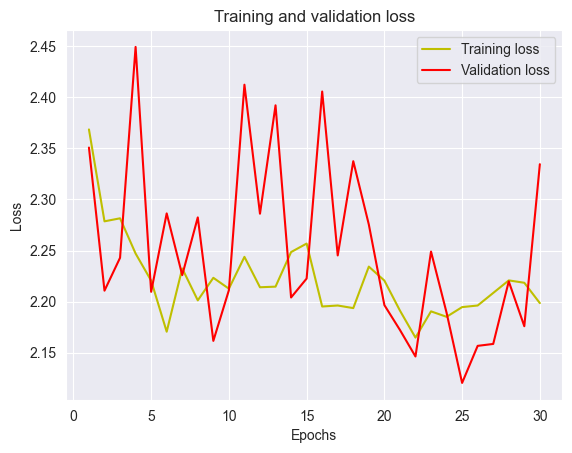

In [25]:
import matplotlib.pyplot as plt

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

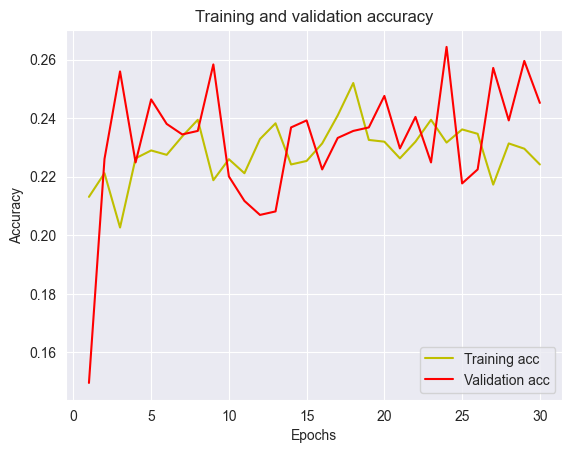

In [26]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class, zero_division=0))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.25      0.18      0.21        11
           3       0.50      0.21      0.30        33
           4       0.35      0.57      0.44        47
           5       0.38      0.40      0.39        98
           6       0.00      0.00      0.00       113
           7       0.23      0.83      0.36       127
           8       0.14      0.21      0.17       107
           9       0.00      0.00      0.00        95
          10       0.15      0.03      0.05        66
          11       0.00      0.00      0.00        39
          12       0.00      0.00      0.00        26
          13       0.00      0.00      0.00        18
          14       0.00      0.00      0.00        14
          15       0.00      0.00      0.00        10
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         8
          18       0.00    